### 목표
 - 버섯의 특징을 활용해서 독/식용 버섯 구분
 - DecisionTree 모델사용
 - 인코딩
 - 특성 선택해보기

In [ ]:
#/content/drive/MyDrive/폴리텍전남캠퍼스/data/mushrooms.csv

In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/폴리텍전남캠퍼스/data/mushrooms.csv')

In [3]:
data.head() # 최근 5개 데이터 출력해 주세요

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# 데이터 크기 확인
data.shape

(8124, 23)

In [ ]:
# 데이터 타입 : 문자 -> 숫자화(전처리)

### 문제 답 분리
- X(문제):loc,iloc 이용해서
- y(답): loc,iloc 이용해서
- shape으로 데이터 확인
- info로 데이터 정보확인

In [7]:
# 문제데이터 : class를 제외한 모든 컬럼
X= data.iloc[:,1:]
# 정답데이터 : class 컬럼
y = data.iloc[:,0]

In [8]:
X.shape , y.shape

((8124, 22), (8124,))

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8124 entries, 0 to 8123
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
8124 non-null   object
dtypes: object(1)
memory usage: 63.6+ KB


### 원핫 인코딩
 - 문자로 입력했을때 입력이 되지 않는 경우가 많음
 - 값을 수치화 시켜주는 것이 필요
 - 범주형 -> 수치형

In [11]:
# 전체 특징을 원핫인코딩 하는 방법
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [13]:
# 일부 특징을 원핫인코딩 하는 방법
XX_one_hot = pd.get_dummies(X,columns=['cap-shape'])
XX_one_hot

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,ring-type,spore-print-color,population,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,s,n,t,p,f,c,n,k,e,e,...,p,k,s,u,0,0,0,0,0,1
1,s,y,t,a,f,c,b,k,e,c,...,p,n,n,g,0,0,0,0,0,1
2,s,w,t,l,f,c,b,n,e,c,...,p,n,n,m,1,0,0,0,0,0
3,y,w,t,p,f,c,n,n,e,e,...,p,k,s,u,0,0,0,0,0,1
4,s,g,f,n,f,w,b,k,t,e,...,e,n,a,g,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,n,f,n,a,c,b,y,e,?,...,p,b,c,l,0,0,0,1,0,0
8120,s,n,f,n,a,c,b,y,e,?,...,p,b,v,l,0,0,0,0,0,1
8121,s,n,f,n,a,c,b,n,e,?,...,p,b,c,l,0,0,1,0,0,0
8122,y,n,f,y,f,c,n,b,t,?,...,e,w,v,l,0,0,0,1,0,0


In [14]:
XX_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-surface               8124 non-null   object
 1   cap-color                 8124 non-null   object
 2   bruises                   8124 non-null   object
 3   odor                      8124 non-null   object
 4   gill-attachment           8124 non-null   object
 5   gill-spacing              8124 non-null   object
 6   gill-size                 8124 non-null   object
 7   gill-color                8124 non-null   object
 8   stalk-shape               8124 non-null   object
 9   stalk-root                8124 non-null   object
 10  stalk-surface-above-ring  8124 non-null   object
 11  stalk-surface-below-ring  8124 non-null   object
 12  stalk-color-above-ring    8124 non-null   object
 13  stalk-color-below-ring    8124 non-null   object
 14  veil-type               

### 데이터 분할
- train,test 데이터를 분할
- train_test_split 나누세요
- 비율은 7:3
- X_train,X_test,y_train,y_test
- random_state = ???

In [15]:
from sklearn.model_selection import train_test_split
#train_test_split(문제,답지)
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y,
                                                 test_size= 0.3,
                                                 random_state=42)

In [16]:
X_train.shape, y_train.shape
# 8124 rows × 117 columns

((5686, 117), (5686,))

In [17]:
X_test.shape, y_test.shape

((2438, 117), (2438,))

In [22]:
# 모델 생성
from sklearn.tree import DecisionTreeClassifier

In [23]:
# 모델 객체를 생성
tree_model = DecisionTreeClassifier()

In [24]:
# 모델학습
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
# 예측
pre = tree_model.predict(X_test)

In [27]:
pre

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [28]:
y_test

1971    e
6654    p
5606    p
3332    e
6988    p
       ..
462     e
1956    e
3781    p
799     e
2402    e
Name: class, Length: 2438, dtype: object

In [31]:
# 정확도 평가
# accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pre)
print('score',acc_score*100)
print('score {:,.2f}%입니다'.format(acc_score*100))

score 100.0
score 100.00%입니다


### Tree 구조 시각화

In [32]:
pip install graphviz

In [33]:
import graphviz

In [35]:
# 모델 모양 출력파일 만들기
from sklearn.tree import export_graphviz

export_graphviz(tree_model,# 학습된 모델의 이름
                out_file = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/tree.dot',# 출력파일 이름
                class_names = ['독','식용'],# 정답 이름
                feature_names = X_one_hot.columns, # 특징의 이름
                impurity = True, # 불순도 gini
                filled =True, # 노드의 색상 출력
                )

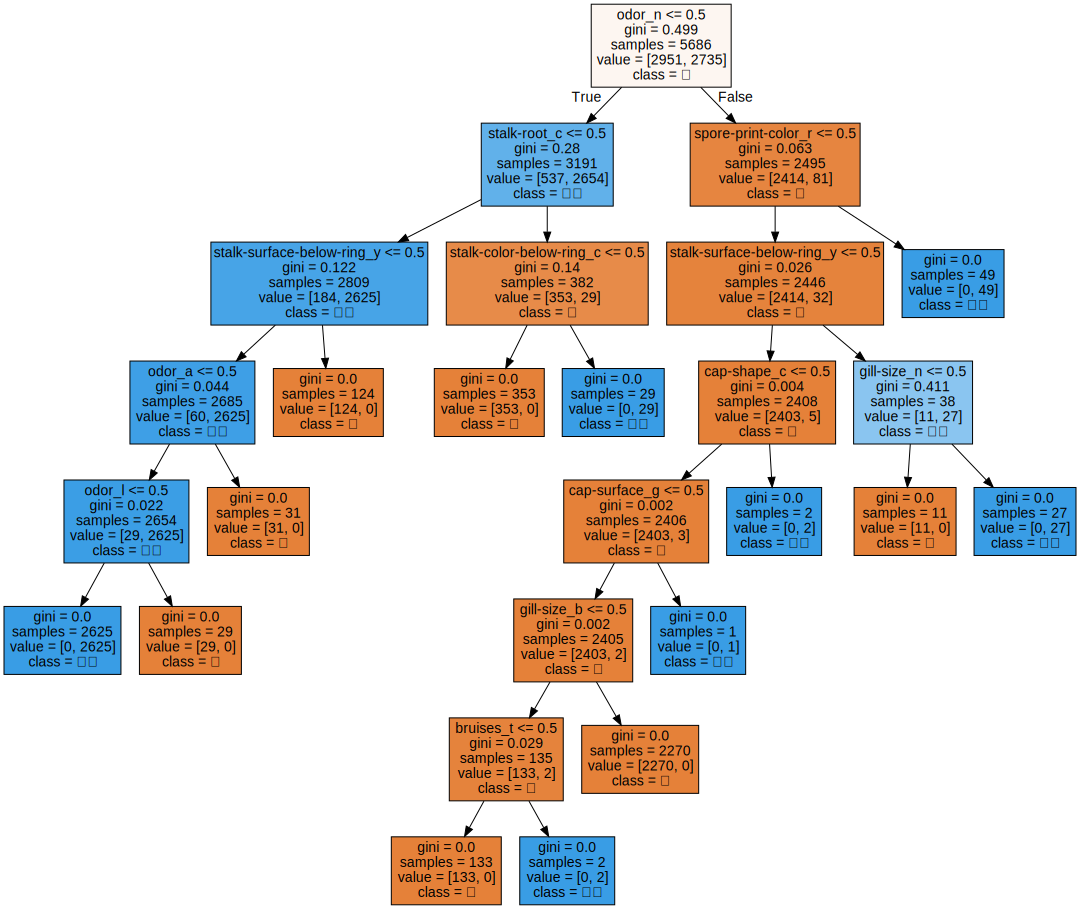

In [36]:
# 모델 출력하기
with open('/content/tree.dot', encoding='UTF8') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 과대적합 제어(하이퍼 파라미터 튜닝)
 - max_depth: 트리의 깊이 제어

In [37]:
# 모델 객체를 생성
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [38]:
# tree_model2.fit
# 모델 학습
tree_model2.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [42]:
# tree2.dot 파일 생성
export_graphviz(tree_model2,# 학습된 모델의 이름
                # out_file = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/tree2.dot',# 출력파일 이름
                out_file = 'tree2.dot',# 출력파일 이름
                class_names = ['독','식용'],# 정답 이름
                feature_names = X_one_hot.columns, # 특징의 이름
                impurity = True, # 불순도 gini
                filled =True, # 노드의 색상 출력
                )

In [40]:
# tree_model2.score
score = tree_model2.score(X_test,y_test)
score

0.9819524200164069

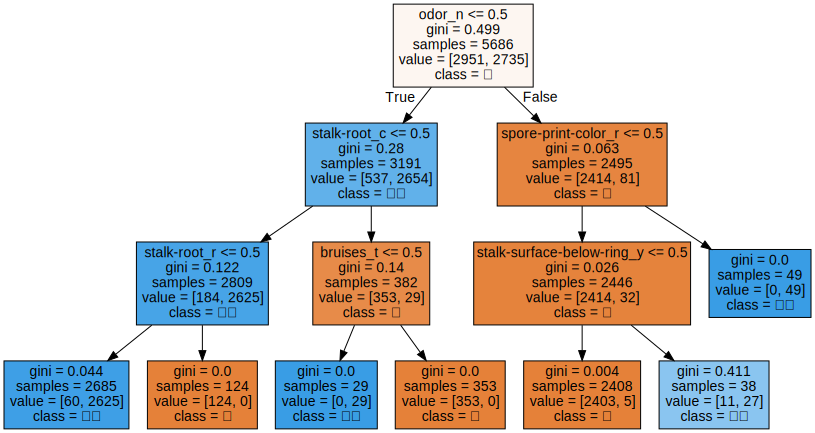

In [43]:
# 모델 출력하기
with open('/content/tree2.dot', encoding='UTF8') as f:
  dot_graph2 = f.read()

display(graphviz.Source(dot_graph2))